In [1]:
cd /content/drive/MyDrive/Ayush_Gupta/Toonify

/content/drive/MyDrive/Ayush_Gupta/Toonify


In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
# !git clone https://github.com/justinpinkney/stylegan2
# %cd stylegan2
# !nvcc test_nvcc.cu -o test_nvcc -run

fatal: destination path 'stylegan2' already exists and is not an empty directory.
/content/drive/MyDrive/Ayush_Gupta/Toonify/stylegan2
CPU says hello.
GPU says hello.


In [ ]:
# !mkdir raw
# !mkdir aligned
# !mkdir generated

In [3]:
cd /content/drive/MyDrive/Ayush_Gupta/Toonify/stylegan2

/content/drive/MyDrive/Ayush_Gupta/Toonify/stylegan2


In [4]:
# !wget https://upload.wikimedia.org/wikipedia/commons/6/6d/Shinz%C5%8D_Abe_Official.jpg -O raw/1.jpeg

In [5]:
cd /content/drive/MyDrive/Ayush_Gupta/Toonify/stylegan2/raw/


/content/drive/MyDrive/Ayush_Gupta/Toonify/stylegan2/raw


In [6]:
cd /content/drive/MyDrive/Ayush_Gupta/Toonify/stylegan2

/content/drive/MyDrive/Ayush_Gupta/Toonify/stylegan2


In [7]:
import pretrained_networks

# use my copy of the blended model to save Doron's download bandwidth
# get the original here https://mega.nz/folder/OtllzJwa#C947mCCdEfMCRTWnDcs4qw
blended_url = "https://drive.google.com/uc?id=1H73TfV5gQ9ot7slSed_l-lim9X7pMRiU" 
ffhq_url = "http://d36zk2xti64re0.cloudfront.net/stylegan2/networks/stylegan2-ffhq-config-f.pkl"

_, _, Gs_blended = pretrained_networks.load_networks(blended_url)
_, _, Gs = pretrained_networks.load_networks(ffhq_url)

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


In [8]:
!python align_images.py raw aligned

64045056/64040097 [==============================] - 6s 0us/step


In [9]:
!python project_images.py --num-steps 500 aligned generated

Loading networks from "http://d36zk2xti64re0.cloudfront.net/stylegan2/networks/stylegan2-ffhq-config-f.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Loading images from ".stylegan2-tmp/dataset/images"
detected 1 images ...
Creating dataset ".stylegan2-tmp/dataset/tfrecords"
Adding the images to tfrecords ...
added images 0
Added 1 images.
Projecting image "1_01.png"...
Loading images from ".stylegan2-tmp/dataset/images"
detected 1 images ...
Creating dataset ".stylegan2-tmp/dataset/tfrecords"
Adding the images to tfrecords ...
added images 0
Added 1 images.
Projecting image "472-4725559_james-bond-full-body-hd-png-download_01.png"...
Loading images from ".stylegan2-tmp/dataset/images"
detected 1 images ...
Creating dataset ".stylegan2-tmp/dataset/tfrecords"
Adding the images to tfrecords ...
added images 0
Added 1 images.
Projecting image "example_01.png"...
Loa

In [10]:
import numpy as np
from PIL import Image
import dnnlib
import dnnlib.tflib as tflib
from pathlib import Path

latent_dir = Path("generated")
latents = latent_dir.glob("*.npy")
for latent_file in latents:
  latent = np.load(latent_file)
  latent = np.expand_dims(latent,axis=0)
  synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=False), minibatch_size=8)
  images = Gs_blended.components.synthesis.run(latent, randomize_noise=False, **synthesis_kwargs)
  Image.fromarray(images.transpose((0,2,3,1))[0], 'RGB').save(latent_file.parent / (f"{latent_file.stem}-toon.jpg"))


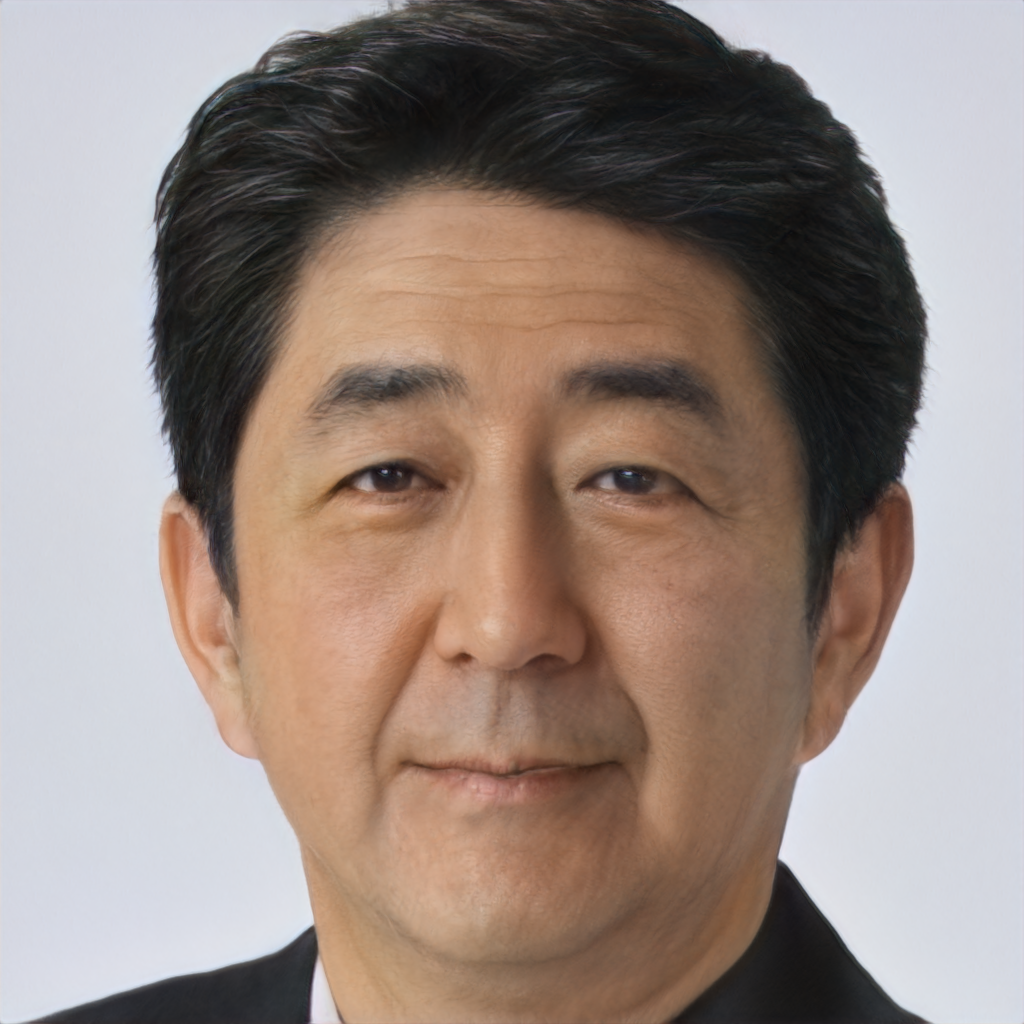

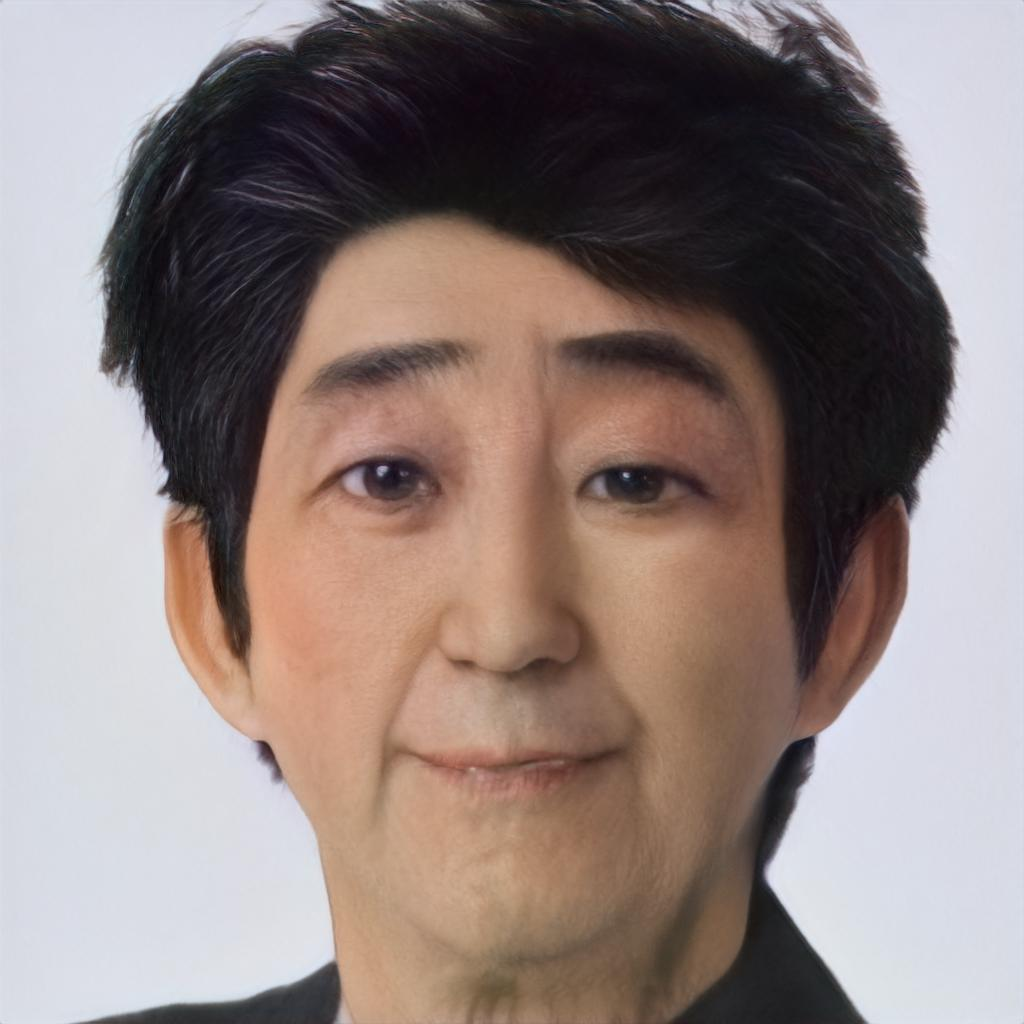

In [11]:
from IPython.display import Image 
embedded = Image(filename="generated/example_01.png", width=256)
display(embedded)
tooned = Image(filename="generated/example_01-toon.jpg", width=256)
display(tooned)

In [ ]:
# !zip -r "/content/drive/MyDrive/Ayush_Gupta/Toonify/stylegan2/a.zip" "/content/drive/MyDrive/Ayush_Gupta/Toonify/stylegan2/generated"